In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

<h2>Attributes</h2>
<p>Alcohol	Alcohol content in percentage
Malic acid	Malic acid content in grams per liter
Ash	Ash content in grams per liter
Alcalinity of ash	Total alkalinity of ash in meq per liter
Magnesium	Magnesium content in milligrams per liter
Total phenols	Total phenols content in milligrams per liter
Flavanoids	Flavanoids content in milligrams per liter
Nonflavanoid phenols	Nonflavanoid phenols content in milligrams per liter
Proanthocyanins	Proanthocyanins content in milligrams per liter
Color intensity	Color intensity
Hue	Hue
OD280/OD315 of diluted wines	OD280/OD315 of diluted wines
Proline	Proline content in milligrams per liter
<p>

In [3]:
wine = datasets.load_wine()
wine_df = pd.DataFrame(wine.data, columns = wine.feature_names)
wine_df['target'] = pd.Series(wine.target)

In [4]:
wine_df.shape

(178, 14)

In [5]:
data = wine_df

In [6]:
# data = pd.read_csv("winequality-red.csv")

In [7]:
# data.shape

In [8]:
# column = data.columns

In [9]:
# column

In [10]:
# The dataset shows the ranking of the quality of the dataset from 0-10 0 being the lowest and 10 being the highest

<AxesSubplot:>

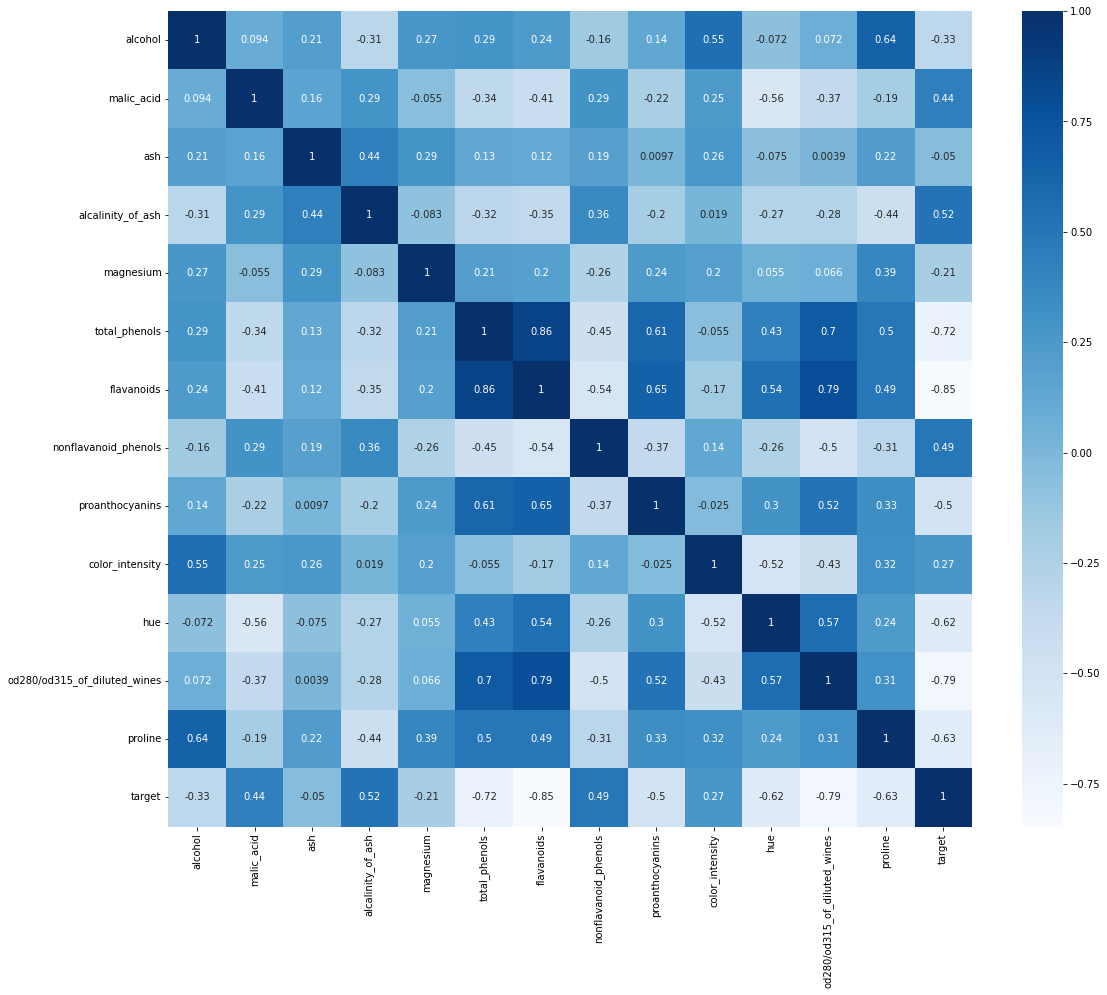

In [11]:
corr = data.corr()
f, ax = plt.subplots(figsize=(18, 15))
sns.heatmap(corr, cmap="Blues", annot=True)

In [12]:
# data["quality"].value_counts()

In [13]:
data["target"].value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

In [14]:
# Three classes low medium and high
# 0-4 -> 0
# 5 -> 1
#6-7 -> 2
# 8-10 3

In [15]:
# ranges = [0, 4, 5, 7, 10]
# labels = [0, 1, 2, 3]

In [16]:
# data['quality_label'] = np.select(
#     [data['quality'].between(ranges[i], ranges[i+1], inclusive='right') for i in range(len(labels))],
#     labels,
#     default=''
# )

In [88]:
# df_y = data["quality_label"]
df_y = data["target"]

In [89]:
df_y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int32

In [90]:
df_y = df_y.astype(int)

In [91]:
df_y.value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

In [92]:
df_y.shape

(178,)

In [93]:
df_y = df_y.values.reshape(-1, 1)

In [94]:
# data["quality_label"].value_counts()

In [95]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [96]:
df_x = data.drop(columns=["target"])

In [97]:
data.shape,df_x.shape, df_y.shape

((178, 14), (178, 13), (178, 1))

<h2>Exprolatory Data Analysis

In [98]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [99]:
# data.hist(bins=40, figsize=(20,15))

In [100]:
# column_name = data.target

column_name = wine.feature_names

In [101]:
column_name

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [102]:
# plt.bar(data["quality_label"], data["alcohol"])

Text(0, 0.5, '')

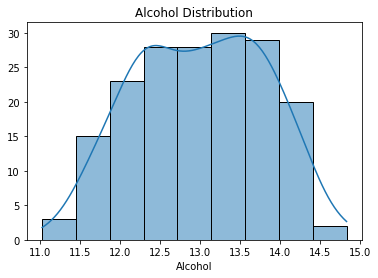

In [103]:
sns.histplot(data["alcohol"], kde=True)
plt.title("Alcohol Distribution")
plt.xlabel("Alcohol")
plt.ylabel("")

Text(0, 0.5, '')

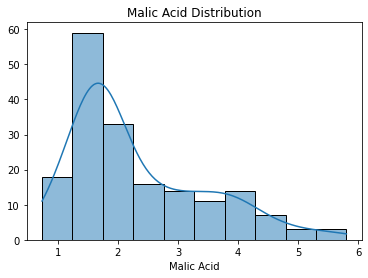

In [104]:
sns.histplot(data["malic_acid"], kde=True)
plt.title("Malic Acid Distribution")
plt.xlabel("Malic Acid")
plt.ylabel("")

Text(0, 0.5, '')

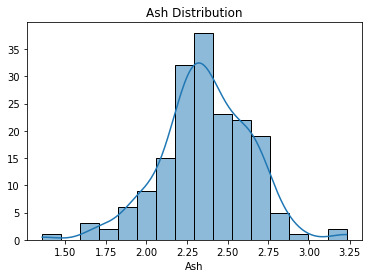

In [105]:
sns.histplot(data["ash"], kde=True)
plt.title("Ash Distribution")
plt.xlabel("Ash")
plt.ylabel("")

Text(0, 0.5, '')

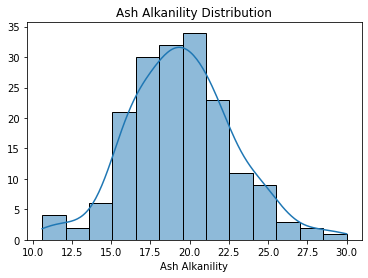

In [106]:
sns.histplot(data["alcalinity_of_ash"], kde=True)
plt.title("Ash Alkanility Distribution")
plt.xlabel("Ash Alkanility")
plt.ylabel("")

Text(0, 0.5, '')

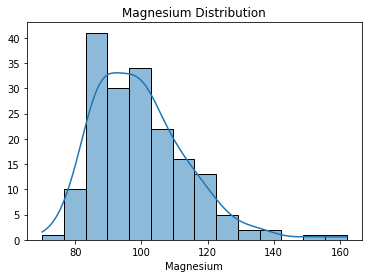

In [107]:
sns.histplot(data["magnesium"], kde=True)
plt.title("Magnesium Distribution")
plt.xlabel("Magnesium")
plt.ylabel("")

Text(0, 0.5, '')

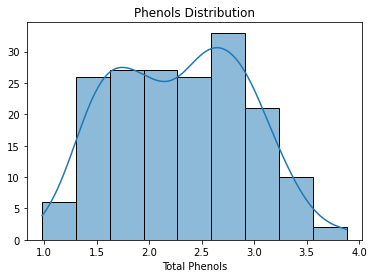

In [108]:
sns.histplot(data["total_phenols"], kde=True)
plt.title("Phenols Distribution")
plt.xlabel("Total Phenols")
plt.ylabel("")

Text(0, 0.5, '')

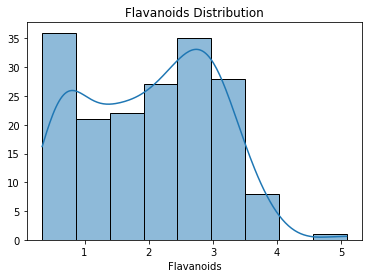

In [109]:
sns.histplot(data["flavanoids"], kde=True)
plt.title("Flavanoids Distribution")
plt.xlabel("Flavanoids")
plt.ylabel("")

Text(0, 0.5, '')

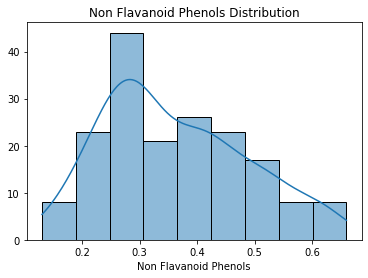

In [110]:
sns.histplot(data["nonflavanoid_phenols"], kde=True)
plt.title("Non Flavanoid Phenols Distribution")
plt.xlabel("Non Flavanoid Phenols")
plt.ylabel("")

Text(0, 0.5, '')

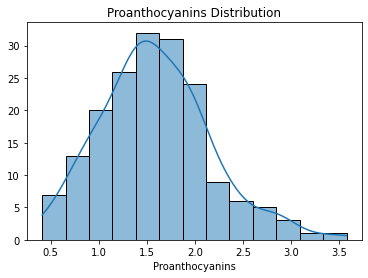

In [111]:
sns.histplot(data["proanthocyanins"], kde=True)
plt.title("Proanthocyanins Distribution")
plt.xlabel("Proanthocyanins")
plt.ylabel("")

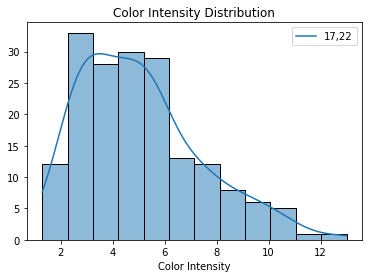

In [112]:
sns.histplot(data["color_intensity"], kde=True)
plt.title("Color Intensity Distribution")
plt.xlabel("Color Intensity")
plt.ylabel("")
plt.legend(["17,22"])

Text(0, 0.5, '')

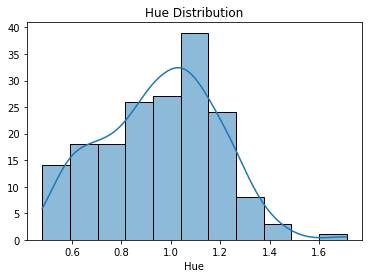

In [113]:
sns.histplot(data["hue"], kde=True)
plt.title("Hue Distribution")
plt.xlabel("Hue")
plt.ylabel("")

Text(0, 0.5, '')

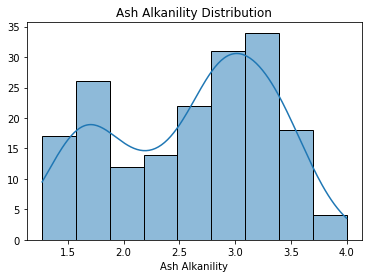

In [114]:
sns.histplot(data["od280/od315_of_diluted_wines"], kde=True)
plt.title("Ash Alkanility Distribution")
plt.xlabel("Ash Alkanility")
plt.ylabel("")

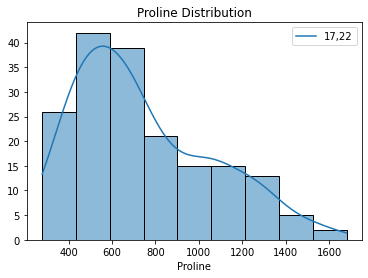

In [115]:
sns.histplot(data["proline"], kde=True)
plt.title("Proline Distribution")
plt.xlabel("Proline")
plt.ylabel("")
plt.legend(["17,22"])

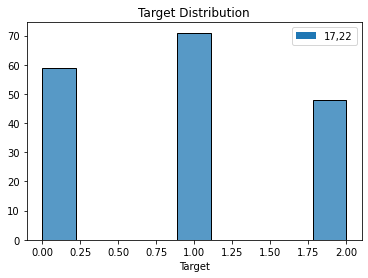

In [116]:
sns.histplot(data["target"])
plt.title("Target Distribution")
plt.xlabel("Target")
plt.ylabel("")
plt.legend(["17,22"])

<h3>Decision Tree without using any hyperparameters

In [117]:
df_y.shape

(178, 1)

In [44]:
# df_x = data.drop(columns=["quality", "quality_label"])
# df_x = data.drop(columns=["quality"])

In [118]:
df_x

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [121]:
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, test_size=1/3, random_state=20)

In [122]:
train_x.shape, train_y.shape

((118, 13), (118, 1))

In [128]:
clf_dt1 = DecisionTreeClassifier(criterion="entropy")
clf_dt1.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy')

In [133]:
labels = ["0","1","2"]

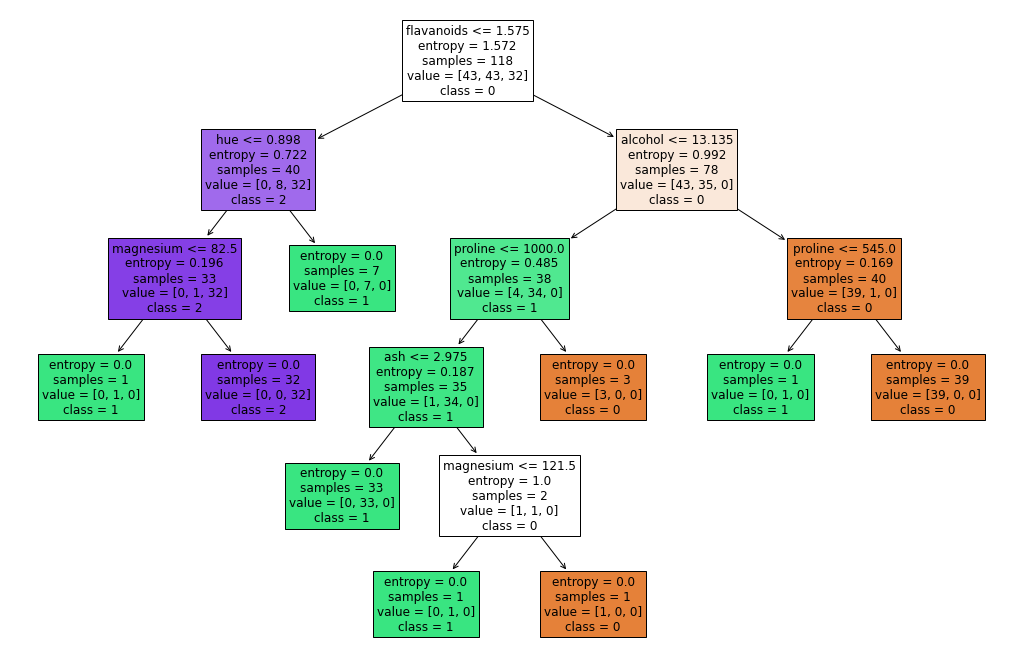

In [157]:

# plt.figure(figsize=(40,20))
# tree.plot_tree(classifier_1)
fig = plt.figure(figsize=(18,12))
_ = tree.plot_tree(clf_dt1, 
                   feature_names=wine.feature_names,  
                   class_names=labels,
                   filled=True,
                   fontsize=12
                   )

Accuracy score of train set


In [160]:
report_dt1_train = classification_report(clf_dt1.predict(train_x), train_y)
print(report_dt1_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        32

    accuracy                           1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118



In [188]:
report_dt1_test = classification_report(test_y, clf_dt1.predict(test_x))
print(report_dt1_test)

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.84      0.96      0.90        28
           2       1.00      0.81      0.90        16

    accuracy                           0.90        60
   macro avg       0.93      0.88      0.90        60
weighted avg       0.91      0.90      0.90        60



In [189]:
y_pred =clf_dt1.predict(test_x)

In [190]:
cm = confusion_matrix(test_y, y_pred)

In [165]:
test_x.shape

(60, 13)

In [166]:
cm.flatten().sum()

60

Text(87.0, 0.5, 'True Class')

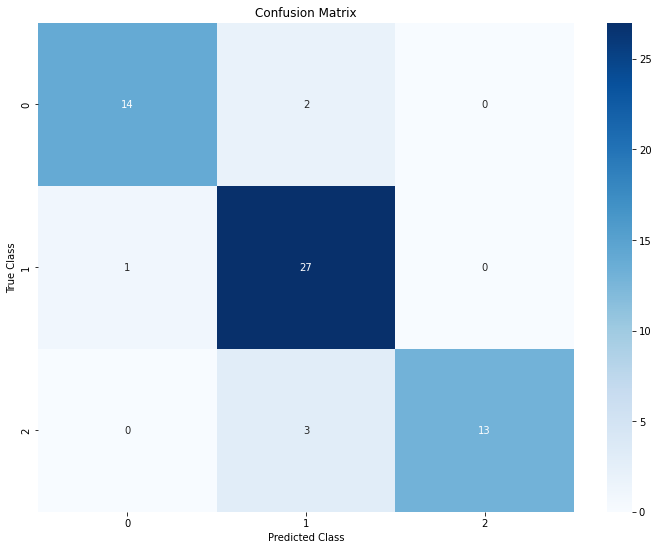

In [167]:
plt.figure(figsize=(12, 9))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, fmt="", cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

In [170]:
feature_importance = clf_dt1.feature_importances_

In [171]:
feature_importance

array([0.28148289, 0.        , 0.02453551, 0.        , 0.04563515,
       0.        , 0.42701804, 0.        , 0.        , 0.        ,
       0.12082453, 0.        , 0.10050388])

In [172]:
#  This sorts the values in the feature importances in a descending order
sorted_indices = feature_importance.argsort()[::-1]

In [173]:
#  The sorted importance sorts the imporance values using the indices provided
sorted_importance = feature_importance[sorted_indices]

In [174]:
# Sorts the features of the datset in the sorted manner
sorted_features = train_x.columns[sorted_indices]

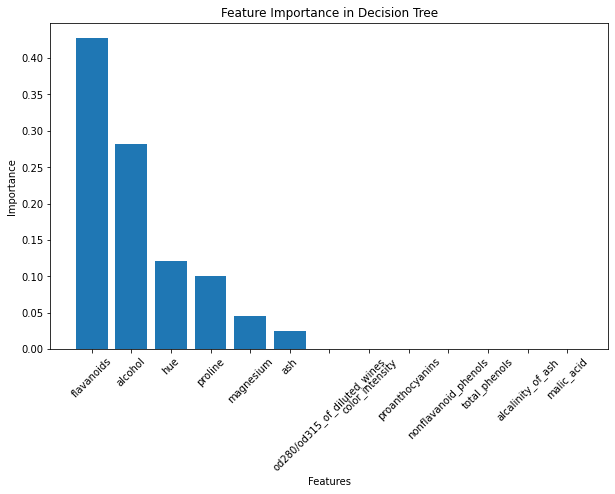

In [175]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importance)), sorted_importance, tick_label=sorted_features)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Decision Tree')
plt.xticks(rotation=45)
plt.show()

In [77]:
feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

In [177]:
scores = cross_val_score(clf_dt1, df_x, df_y, cv=5)

In [178]:
scores.mean()

0.9214285714285715

In [179]:
y_pred_train = clf_dt1.predict(train_x)
accuracy_score(train_y, y_pred_train)

1.0

<h3>Classification with hyperparameters

In [181]:
clf_dt2 = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf_dt2.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

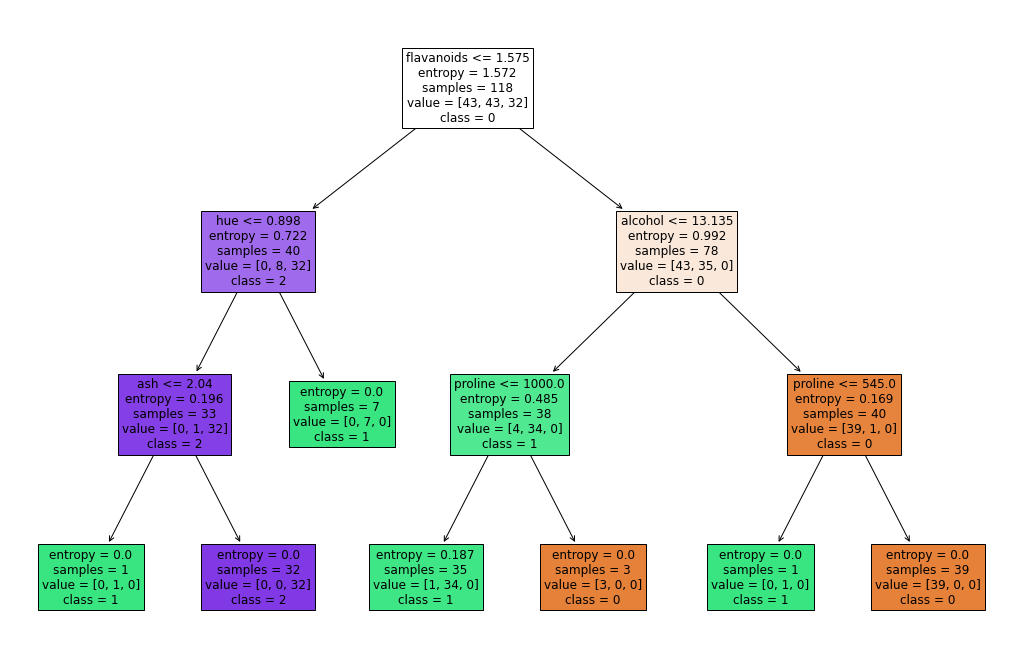

In [182]:
fig = plt.figure(figsize=(18,12))
_ = tree.plot_tree(clf_dt2, 
                   feature_names=wine.feature_names,  
                   class_names=labels,
                   filled=True,
                   fontsize=12
                   )

Prediction on Test And Train Set

In [186]:
report_dt2_train = classification_report(clf_dt2.predict(train_x), train_y)
print(report_dt1_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        32

    accuracy                           1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118



In [187]:
report_dt2_test = classification_report(test_y, clf_dt2.predict(test_x))
print(report_dt2_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        32

    accuracy                           1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118



More Hyperparameters

In [191]:
clf_dt3 = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=10, min_samples_leaf=2)

In [192]:
clf_dt3.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2,
                       min_samples_split=10)

In [193]:
report_dt3_train = classification_report(clf_dt3.predict(train_x), train_y)
print(report_dt3_train)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.98      0.95      0.97        44
           2       0.97      1.00      0.98        31

    accuracy                           0.97       118
   macro avg       0.97      0.98      0.98       118
weighted avg       0.97      0.97      0.97       118



In [194]:
report_dt3_test = classification_report(test_y, clf_dt3.predict(test_x))
print(report_dt3_test)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.81      0.93      0.87        28
           2       1.00      0.75      0.86        16

    accuracy                           0.87        60
   macro avg       0.90      0.85      0.87        60
weighted avg       0.88      0.87      0.87        60



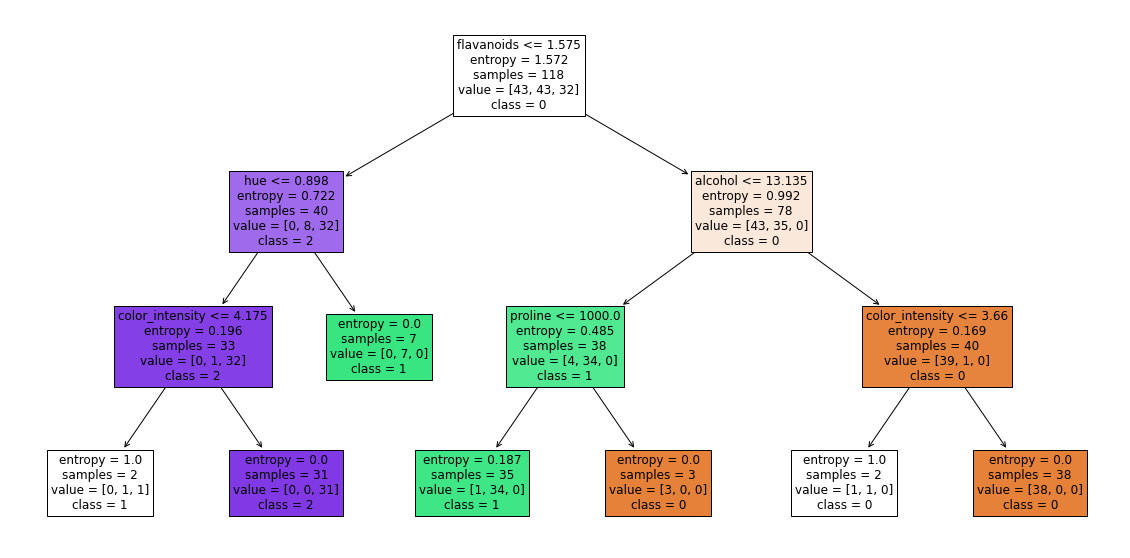

In [196]:
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(clf_dt3, 
                   feature_names=wine.feature_names,  
                   class_names=labels,
                   filled=True,
                   fontsize=12
                   )

In [197]:
path = clf_dt1.cost_complexity_pruning_path(train_x, train_y)

In [198]:
path

{'ccp_alphas': array([0.        , 0.01694915, 0.03856923, 0.05478819, 0.0571732 ,
        0.10081644, 0.1899332 , 0.44248421, 0.6712619 ]),
 'impurities': array([0.        , 0.01694915, 0.05551838, 0.11030657, 0.16747976,
        0.2682962 , 0.45822941, 0.90071362, 1.57197552])}

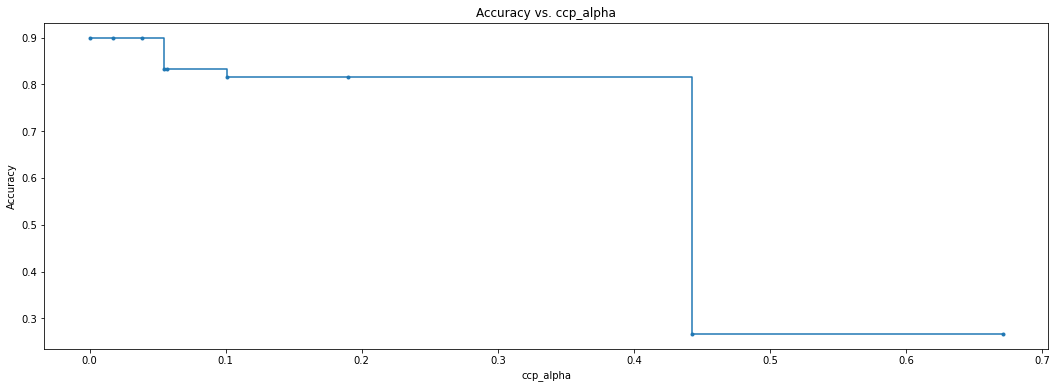

In [207]:
# Extract different values of ccp_alpha and corresponding accuracy scores
ccp_alphas = path.ccp_alphas
scores = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(train_x, train_y)
    y_pred = clf.predict(test_x)
    accuracy = accuracy_score(test_y, y_pred)
    scores.append(accuracy)

# Plot the accuracy scores as a function of ccp_alpha
fig = plt.figure(figsize=(18,6))
plt.plot(ccp_alphas, scores, marker='.', drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. ccp_alpha")
plt.show()

In [208]:
index_val = np.array(scores).argmax()

In [209]:
index_val

0

In [210]:
ccp_alpha_value = ccp_alphas[index_val]

In [211]:
ccp_alpha_value

0.0

In [152]:
scores_new = []
for max_depth_value in range(1,5):
    for min_samples_split_value in range(2, 10):
        for min_samples_leaf_value in range(1,10):
            clf = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth_value, min_samples_leaf=min_samples_leaf_value, min_samples_split=min_samples_split_value)
            clf.fit(train_x, train_y)
            y_pred = clf.predict(test_x)
            accuracy = accuracy_score(test_y, y_pred)
            scores_new.append({"max_depth":max_depth_value,"min_samples_split":min_samples_split_value, "min_samples_leaf": min_samples_leaf_value, "accuracy": accuracy})


In [225]:
criterion_name = ["entropy", "gini", "log_loss"]

In [234]:
parameters = dict(criterion=criterion_name,
                      max_depth=range(1,10),
                      min_samples_split=range(2,20),
                      min_samples_leaf=range(1,20)
                      )
clf = DecisionTreeClassifier()
gscv = GridSearchCV(clf, param_grid=parameters, scoring="accuracy", cv=5)
gscv.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 20),
                         'min_samples_split': range(2, 20)},
             scoring='accuracy')

In [235]:
print(gscv.best_params_)

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [236]:
clf_dt4 = DecisionTreeClassifier(criterion="entropy", max_depth=6, min_samples_leaf=1, min_samples_split=2)
clf_dt4.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

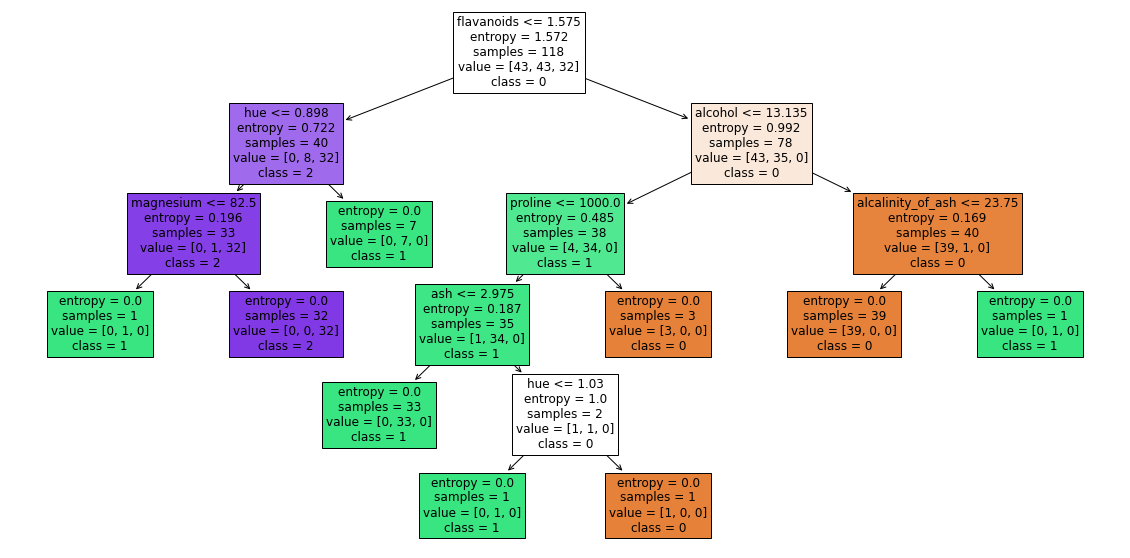

In [237]:
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(clf_dt4, 
                   feature_names=wine.feature_names,  
                   class_names=labels,
                   filled=True,
                   fontsize=12
                   )

In [238]:
report_dt4_train = classification_report(clf_dt4.predict(train_x), train_y)
print(report_dt4_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        32

    accuracy                           1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118



In [239]:
report_dt4_test = classification_report(test_y, clf_dt4.predict(test_x))
print(report_dt4_test)

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.84      0.96      0.90        28
           2       1.00      0.81      0.90        16

    accuracy                           0.90        60
   macro avg       0.93      0.88      0.90        60
weighted avg       0.91      0.90      0.90        60

